In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [27]:
dataset = pd.read_csv('/content/possum1.csv')
dataset.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [28]:
from sklearn.preprocessing import OrdinalEncoder

dataset['Pop'] = dataset['Pop'].map({'Vic': 1, 'other': 0})

enc = OrdinalEncoder()
dataset[['sex']] = enc.fit_transform(dataset[['sex']])

dataset.drop(columns=['case'], inplace=True)

dataset.head()


,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1.0,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,1,0.0,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,1,0.0,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,1,0.0,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,1,0.0,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    int64  
 2   sex       104 non-null    float64
 3   age       104 non-null    int64  
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  104 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 10.7 KB


In [31]:
vals = dataset["age"].unique()
vals


array([8, 6, 2, 1, 9, 5, 3, 4, 7])

In [32]:
cols_for_clusters = ['site', 'Pop','sex','hdlngth', 'skullw', 'totlngth', 'taill','footlgth','earconch','eye','chest', 'belly' ]

df= dataset[cols_for_clusters].copy()

In [33]:
df.head()


,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,1,0.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,1,0.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,1,0.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,1,0.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [34]:
X = df
y = dataset["age"]

In [35]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

Метод главных компонентов (Principal Component Analysis, PCA)

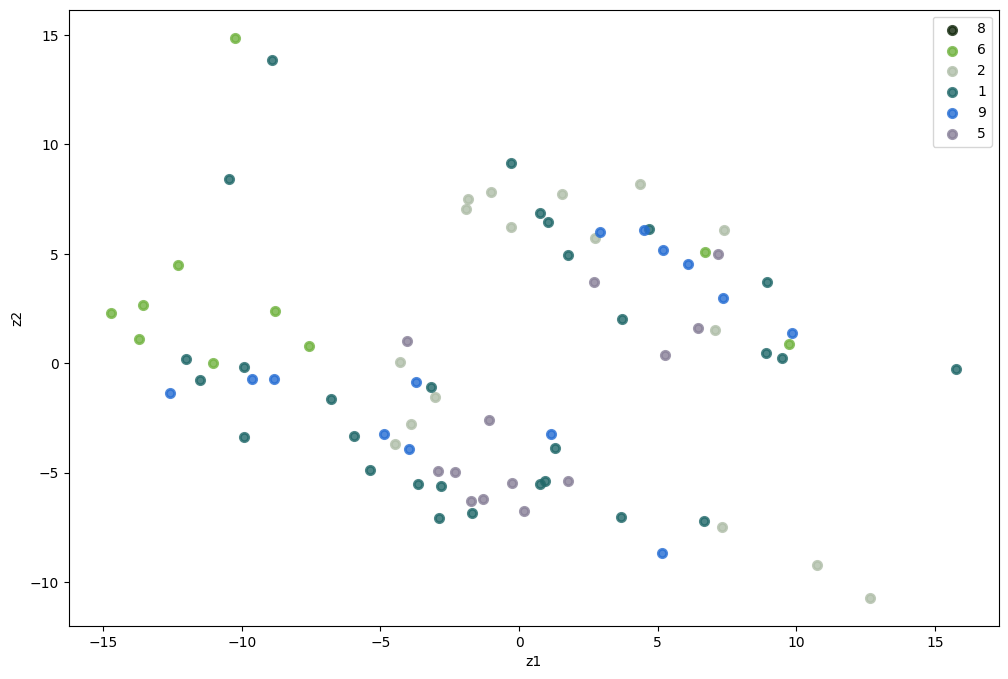

In [36]:
pca = PCA(n_components=4)
X_new = pca.fit(X).transform(X)

plt.figure(figsize=(12,8))
colors = ['#11270b', '#71b340', '#b0bea9', '#216869', '#266dd3', '#888098']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [38]:
pca.explained_variance_ratio_

array([0.48569185, 0.27591805, 0.07312167, 0.04692811])

Независимый анализ компонентов (Independent Component Analysis, ICA)

In [39]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)


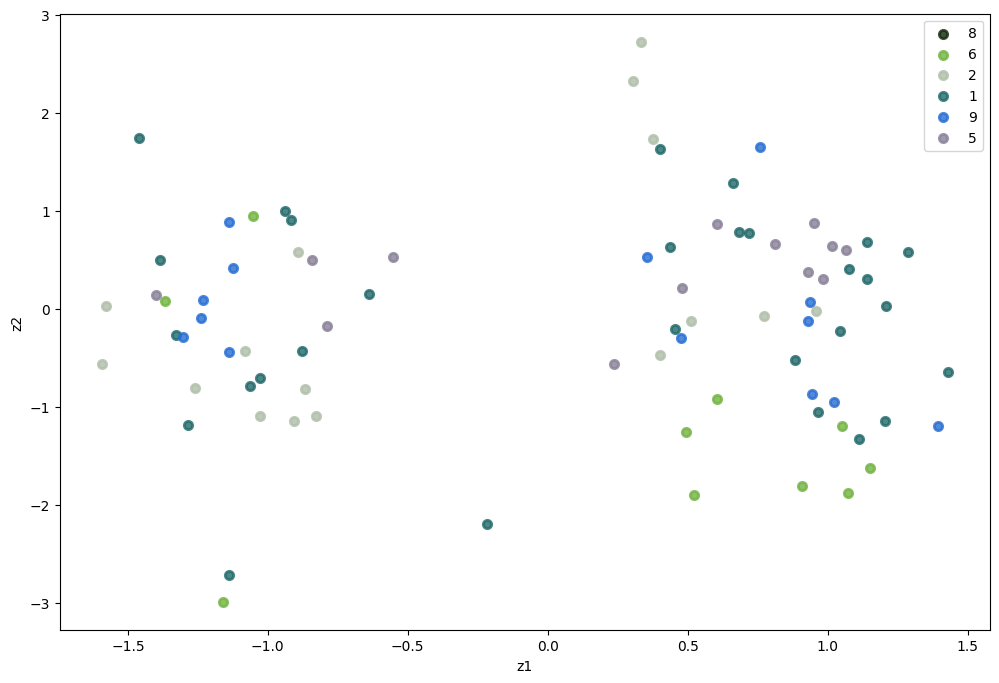

In [40]:
plt.figure(figsize=(12,8))
colors = ['#11270b', '#71b340', '#b0bea9', '#216869', '#266dd3', '#888098']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Kernel PCA

In [41]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

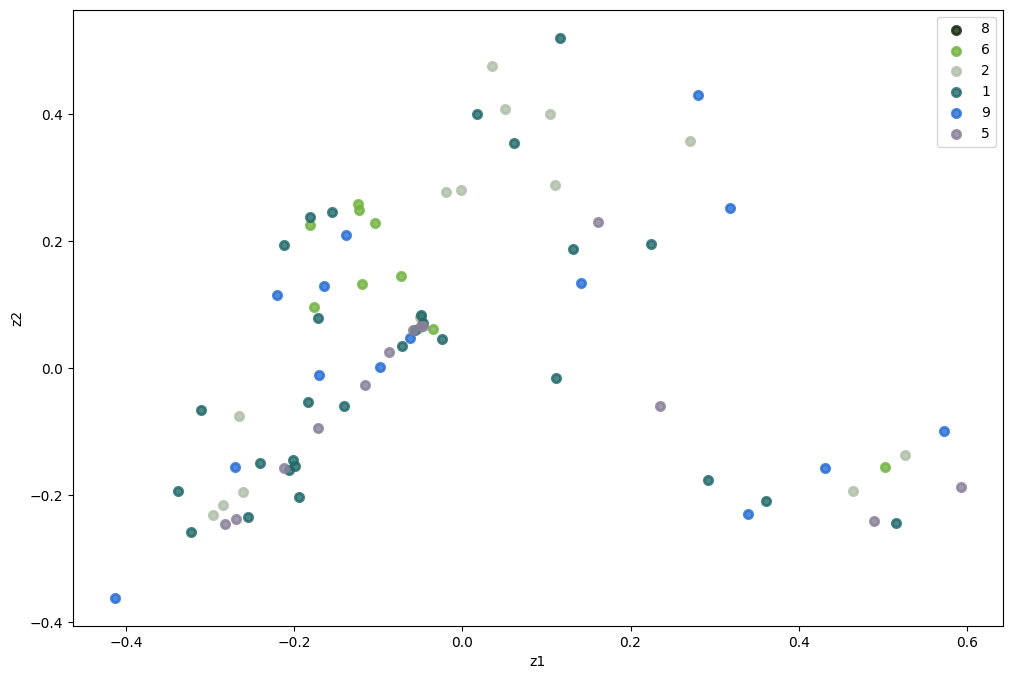

In [42]:
plt.figure(figsize=(12,8))
colors = ['#11270b', '#71b340', '#b0bea9', '#216869', '#266dd3', '#888098']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

tSNE

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [44]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (104, 12)
New Shape of X:  (104, 2)
Kullback-Leibler divergence after optimization:  0.18249854445457458
No. of iterations:  849


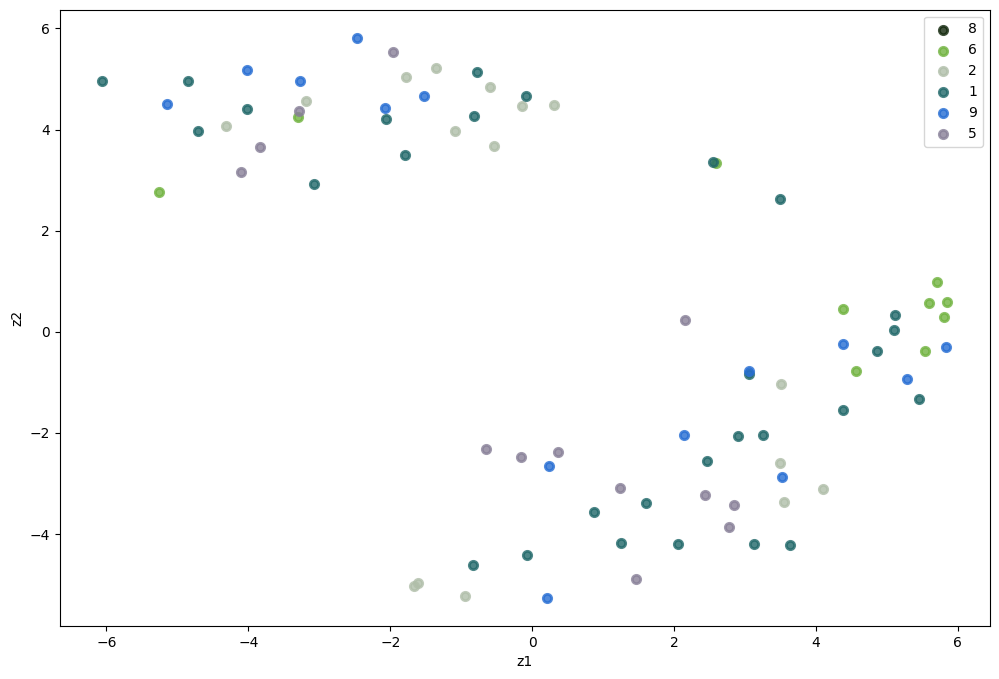

In [45]:
plt.figure(figsize=(12,8))
colors = ['#11270b', '#71b340', '#b0bea9', '#216869', '#266dd3', '#888098']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Поиск выбросов. DBSCAN

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score


In [47]:
dbscan_cluster1 = DBSCAN(eps = 0.2, min_samples = 9)
dbscan_cluster1.fit(X)

DBSCAN(eps=0.2, min_samples=9)

In [48]:
# Number of Clusters
labels=dbscan_cluster1.labels_

N_clus=len(set(labels))-(1 if -1 in labels else 0)
print(f'Estimated no. of clusters: {N_clus}')

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print(f'Estimated no. of noise points: {n_noise}')

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 0
Estimated no. of noise points: 104
v_measure = 0.0


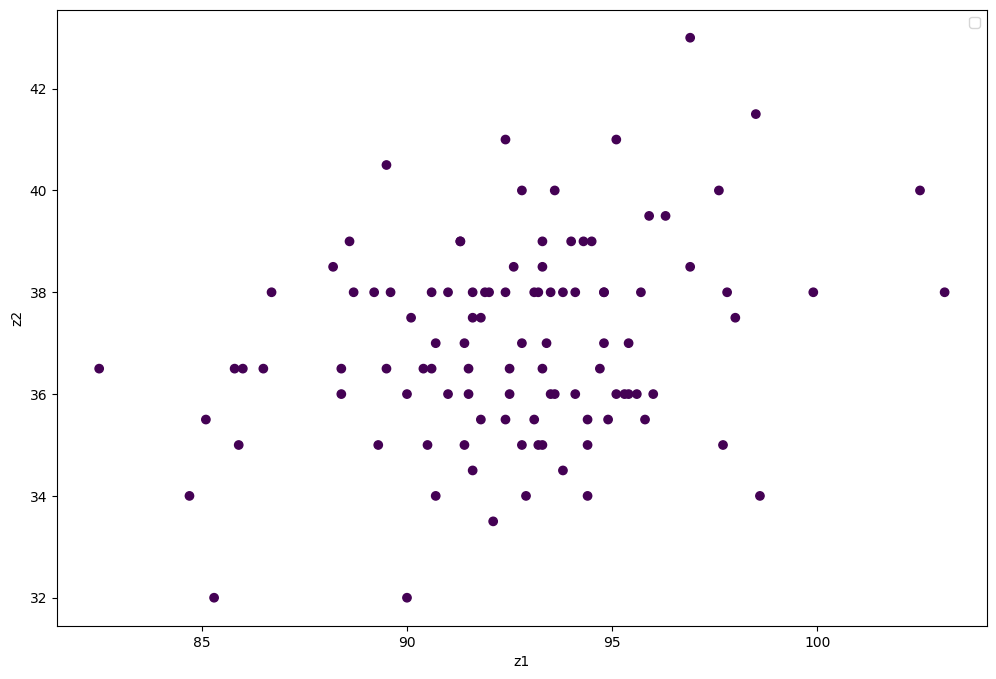

In [50]:
plt.figure(figsize=(12,8))
lw = 2

plt.scatter(
        X['hdlngth'], X['taill'],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [51]:
from sklearn.neighbors import NearestNeighbors

min_samples = 9

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [52]:
import sklearn

sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

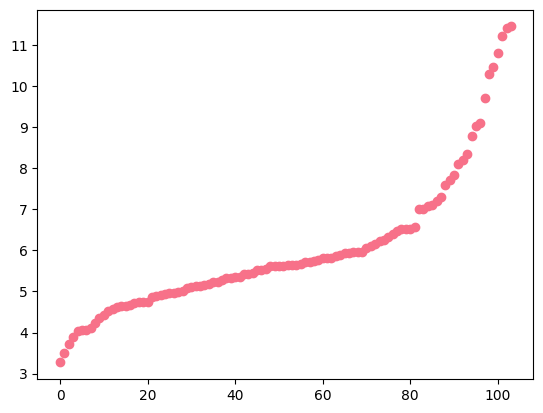

In [53]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

In [54]:
dbscan = DBSCAN(eps = 0.1, min_samples = min_samples)
print(dbscan)


DBSCAN(eps=0.1, min_samples=9)


In [55]:
pred = dbscan.fit_predict(X)

In [56]:
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 0
Estimated no. of noise points: 104
v_measure = 0.0


In [57]:
anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

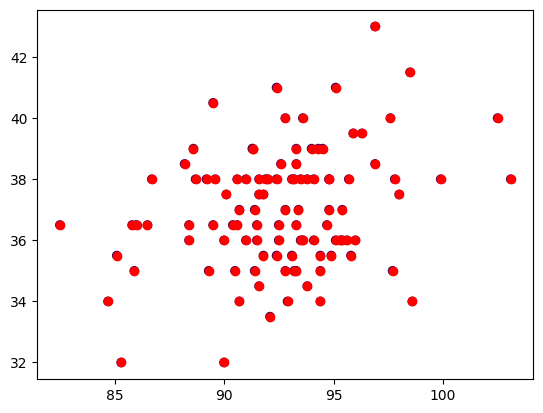

In [59]:

plt.scatter( X['hdlngth'], X['taill'],c=dbscan_cluster1.labels_)
plt.scatter(values['hdlngth'], values['taill'], color='r')
plt.show()
